<a href="https://colab.research.google.com/github/elyesboujelben1/gomycode/blob/main/checkpoint8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("CC GENERAL.csv")
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [2]:
df.drop("CUST_ID",1,inplace=True)

In [3]:
df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].mean(),inplace=True)
df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].mean(),inplace=True)

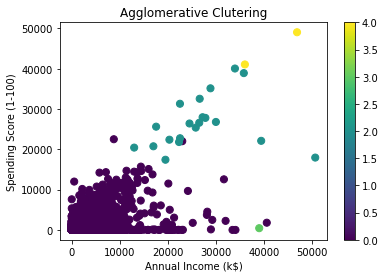

In [4]:
from sklearn.cluster import AgglomerativeClustering #Importing our clustering algorithm : Agglomerative
model=AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='complete')
clust_labels=model.fit_predict(df)  
agglomerative=pd.DataFrame(clust_labels)
import matplotlib.pyplot as plt
fig =plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter (df["PAYMENTS"],df ['PURCHASES']  , c= agglomerative[0], s=50)
ax.set_title("Agglomerative Clutering")
ax.set_xlabel("Annual Income (k$)")
ax.set_ylabel("Spending Score (1-100)")
plt.colorbar(scatter)

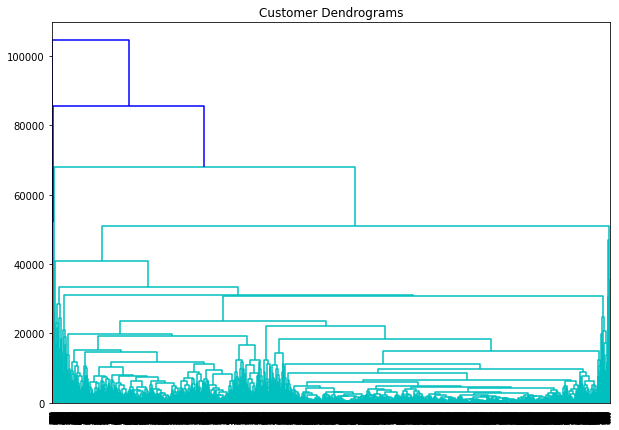

In [5]:
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10,7))
plt.title("Customer Dendrograms")
dend=shc.dendrogram(shc.linkage(df, method="complete"))

In [ ]:
from sklearn.cluster import KMeans  #Importing our clustering algorithm: KMeans
kmeans=KMeans(n_clusters=4, random_state=0)  #Cluster our data by choosing 5 as number of clusters
kmeans.fit(df)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [ ]:
labels=pd.DataFrame(kmeans.labels_)
labels

,0
0,0
1,1
2,1
3,1
4,0
...,...
8945,0
8946,0
8947,0
8948,0


In [ ]:
label=kmeans.predict(df)
print(kmeans.cluster_centers_) 


[[8.54778042e+02 8.53545314e-01 6.03603854e+02 3.13126474e+02
  2.90778056e+02 4.96026573e+02 4.66919195e-01 1.53799827e-01
  3.51674458e-01 1.07073179e-01 2.25921926e+00 1.06270637e+01
  2.73640920e+03 9.98105819e+02 5.30407640e+02 1.56728504e-01
  1.14300262e+01]
 [3.33482495e+03 9.39982227e-01 1.58394530e+03 9.96887220e+02
  5.87371546e+02 2.11357870e+03 5.42614308e-01 3.21949652e-01
  3.85407865e-01 2.10332359e-01 5.72591944e+00 2.21786340e+01
  9.03769901e+03 2.89167420e+03 1.18785446e+03 1.38539275e-01
  1.17373030e+01]
 [4.05814769e+03 9.88636375e-01 1.02737875e+03 1.18389464e+02
  9.08989286e+02 9.22757849e+02 4.71320321e-01 3.92315536e-02
  4.41152625e-01 1.05654714e-01 3.01785714e+00 1.86250000e+01
  4.26785714e+03 1.62493914e+03 2.27600316e+04 1.48808929e-03
  1.19107143e+01]
 [4.79253297e+03 9.10564109e-01 1.07865302e+04 7.66993465e+03
  3.11676612e+03 5.17100806e+03 7.50458054e-01 6.02245070e-01
  6.01053744e-01 2.27004240e-01 9.20930233e+00 8.58914729e+01
  1.24771318e+04

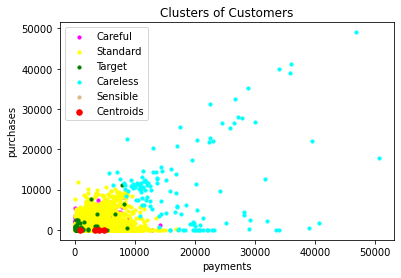

In [ ]:
plt.scatter(df["PAYMENTS"][label == 0],          
            df["PURCHASES"][label == 0],s=10,c='magenta',label='Careful')
plt.scatter(df["PAYMENTS"][label == 1],
           df["PURCHASES"][label == 1],s=10,c='yellow',label='Standard')
plt.scatter(df["PAYMENTS"][label == 2],
           df["PURCHASES"][label == 2],s=10,c='green',label='Target')
plt.scatter(df["PAYMENTS"][label == 3], 
           df["PURCHASES"][label == 3],s=10,c='cyan',label='Careless')
plt.scatter(df["PAYMENTS"][label == 4], 
           df["PURCHASES"][label == 4],s=10,c='burlywood',label='Sensible')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=30, c='red', label = 'Centroids')
plt.title('Clusters of Customers')
plt.xlabel('payments')
plt.ylabel('purchases')
plt.legend()
plt.show()

In [ ]:
from sklearn.cluster import KMeans  #Importing our clustering algorithm: KMeans
kmeans=KMeans(n_clusters=2, random_state=0)  #Cluster our data by choosing 5 as number of clusters
kmeans.fit(df)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [ ]:
labels=pd.DataFrame(kmeans.labels_)
labels

,0
0,1
1,0
2,1
3,1
4,1
...,...
8945,1
8946,1
8947,1
8948,1


In [ ]:
label=kmeans.predict(df)
print(kmeans.cluster_centers_) 


[[3.83174174e+03 9.39821048e-01 2.36499888e+03 1.55149934e+03
  8.13882690e+02 2.59214186e+03 5.57655055e-01 3.45877762e-01
  4.05814518e-01 2.27473224e-01 6.57892004e+00 2.80046729e+01
  9.81438450e+03 4.29529635e+03 1.76439840e+03 1.49536909e-01
  1.17383178e+01]
 [9.42784043e+02 8.60119256e-01 6.29797184e+02 3.29459957e+02
  3.00614658e+02 5.36507864e+02 4.71895469e-01 1.63131506e-01
  3.53091607e-01 1.09827330e-01 2.33570615e+00 1.10643508e+01
  3.03570872e+03 1.03059463e+03 6.17371474e+02 1.54860196e-01
  1.14567198e+01]]


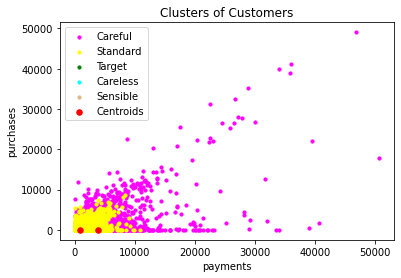

In [ ]:
plt.scatter(df["PAYMENTS"][label == 0],          
            df["PURCHASES"][label == 0],s=10,c='magenta',label='Careful')
plt.scatter(df["PAYMENTS"][label == 1],
           df["PURCHASES"][label == 1],s=10,c='yellow',label='Standard')
plt.scatter(df["PAYMENTS"][label == 2],
           df["PURCHASES"][label == 2],s=10,c='green',label='Target')
plt.scatter(df["PAYMENTS"][label == 3], 
           df["PURCHASES"][label == 3],s=10,c='cyan',label='Careless')
plt.scatter(df["PAYMENTS"][label == 4], 
           df["PURCHASES"][label == 4],s=10,c='burlywood',label='Sensible')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=30, c='red', label = 'Centroids')
plt.title('Clusters of Customers')
plt.xlabel('payments')
plt.ylabel('purchases')
plt.legend()
plt.show()

In [ ]:
from sklearn.cluster import KMeans  #Importing our clustering algorithm: KMeans
kmeans=KMeans(n_clusters=3, random_state=0)  #Cluster our data by choosing 5 as number of clusters
kmeans.fit(df)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [ ]:
labels=pd.DataFrame(kmeans.labels_)
labels

,0
0,0
1,1
2,1
3,1
4,0
...,...
8945,0
8946,0
8947,0
8948,0


In [ ]:
label=kmeans.predict(df)
print(kmeans.cluster_centers_) 


[[8.55769475e+02 8.54414576e-01 6.05531922e+02 3.13659959e+02
  2.92170383e+02 4.95105621e+02 4.67963752e-01 1.54297093e-01
  3.52621567e-01 1.06773224e-01 2.25298622e+00 1.06888208e+01
  2.75077612e+03 9.98866277e+02 5.85602363e+02 1.56964173e-01
  1.14336907e+01]
 [3.40057598e+03 9.40609772e-01 1.58230366e+03 9.88859314e+02
  5.93757125e+02 2.11788076e+03 5.39511439e-01 3.17349631e-01
  3.84691762e-01 2.10875737e-01 5.75054609e+00 2.21266929e+01
  9.01254021e+03 2.89153825e+03 1.56551247e+03 1.34183296e-01
  1.17374399e+01]
 [4.80882923e+03 9.09847656e-01 1.07073796e+04 7.56195397e+03
  3.14559359e+03 5.19105119e+03 7.47270397e-01 5.95595015e-01
  5.99510939e-01 2.26083061e-01 9.17557252e+00 8.55496183e+01
  1.24660305e+04 1.80939666e+04 2.49776397e+03 3.33011382e-01
  1.18396947e+01]]


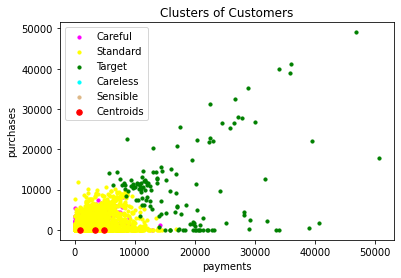

In [ ]:
plt.scatter(df["PAYMENTS"][label == 0],          
            df["PURCHASES"][label == 0],s=10,c='magenta',label='Careful')
plt.scatter(df["PAYMENTS"][label == 1],
           df["PURCHASES"][label == 1],s=10,c='yellow',label='Standard')
plt.scatter(df["PAYMENTS"][label == 2],
           df["PURCHASES"][label == 2],s=10,c='green',label='Target')
plt.scatter(df["PAYMENTS"][label == 3], 
           df["PURCHASES"][label == 3],s=10,c='cyan',label='Careless')
plt.scatter(df["PAYMENTS"][label == 4], 
           df["PURCHASES"][label == 4],s=10,c='burlywood',label='Sensible')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=30, c='red', label = 'Centroids')
plt.title('Clusters of Customers')
plt.xlabel('payments')
plt.ylabel('purchases')
plt.legend()
plt.show()

After trying to read the plots, it turns out that the one with 4 clusters is the easiest one to understand the case so in my opinion it's the best